In [124]:
import pandas as pd
pd.set_option("display.float_format", lambda x: '%.2f'% x)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

import seaborn as sns


In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.000000,1.000000,39.070000
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.000000,3.000000,120.000000
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.000000,3.000000,62.000000
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.000000,1.000000,95.000000
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.000000,1.000000,51.000000


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df1["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df1["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [8]:
df2 = df1.drop(["area_type", "availability", "society", "balcony"], axis = 'columns')

In [9]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.000000,39.070000
1,Chikka Tirupathi,4 Bedroom,2600,5.000000,120.000000
2,Uttarahalli,3 BHK,1440,2.000000,62.000000
3,Lingadheeranahalli,3 BHK,1521,3.000000,95.000000
4,Kothanur,2 BHK,1200,2.000000,51.000000


In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\JANA JOSEPH\AppData\Local\Temp\ipykernel_7976\2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.000000,39.070000,2
1,Chikka Tirupathi,4 Bedroom,2600,5.000000,120.000000,4
2,Uttarahalli,3 BHK,1440,2.000000,62.000000,3
3,Lingadheeranahalli,3 BHK,1521,3.000000,95.000000,3
4,Kothanur,2 BHK,1200,2.000000,51.000000,2


In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df3[df3['bhk']> 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.000000,230.000000,27
4684,Munnekollal,43 Bedroom,2400,40.000000,660.000000,43


In [17]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except ValueError:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.000000,186.000000,4
122,Hebbal,4 BHK,3067 - 8156,4.000000,477.000000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.000000,54.005000,2
165,Sarjapur,2 BHK,1145 - 1340,2.000000,43.490000,2
188,KR Puram,2 BHK,1015 - 1540,2.000000,56.800000,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.000000,18.500000,1
549,Hennur Road,2 BHK,1195 - 1440,2.000000,63.770000,2
648,Arekere,9 Bedroom,4125Perch,9.000000,265.000000,9
661,Yelahanka,2 BHK,1120 - 1145,2.000000,48.130000,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.000000,445.000000,4


In [20]:
def convert_sq_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
df4 = df3.copy()
df4["total_sqft"] = df4['total_sqft'].apply(convert_sq_to_num)
df4 = df4[df4["total_sqft"].notnull()]
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.000000,2.000000,39.070000,2
1,Chikka Tirupathi,4 Bedroom,2600.000000,5.000000,120.000000,4
2,Uttarahalli,3 BHK,1440.000000,2.000000,62.000000,3
3,Lingadheeranahalli,3 BHK,1521.000000,3.000000,95.000000,3
4,Kothanur,2 BHK,1200.000000,2.000000,51.000000,2


In [22]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [23]:
df4.loc[122]

location          Hebbal
size               4 BHK
total_sqft   5611.500000
bath            4.000000
price         477.000000
bhk                    4
Name: 122, dtype: object

In [24]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.000000,2.000000,39.070000,2
1,Chikka Tirupathi,4 Bedroom,2600.000000,5.000000,120.000000,4
2,Uttarahalli,3 BHK,1440.000000,2.000000,62.000000,3
3,Lingadheeranahalli,3 BHK,1521.000000,3.000000,95.000000,3
4,Kothanur,2 BHK,1200.000000,2.000000,51.000000,2


In [25]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price'] * 100000 /df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.000000,2.000000,39.070000,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.000000,5.000000,120.000000,4,4615.384615
2,Uttarahalli,3 BHK,1440.000000,2.000000,62.000000,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.000000,3.000000,95.000000,3,6245.890861
4,Kothanur,2 BHK,1200.000000,2.000000,51.000000,2,4250.000000


In [26]:
df5.price_per_sqft.describe()

count      13200.000000
mean        7920.759150
std       106727.155209
min          267.829813
25%         4267.701345
50%         5438.331478
75%         7317.073171
max     12000000.000000
Name: price_per_sqft, dtype: float64

In [27]:
min = df5.price_per_sqft.min()
max = df5.price_per_sqft.max()
min, max

(267.82981328435875, 12000000.0)

In [28]:
df5['location'] = df5.location.apply(lambda x : x.strip())
location_stat = df5['location'].value_counts()
location_stat

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [29]:
location_stat.values.sum()

13200

In [30]:
len(location_stat[location_stat>10])

240

In [31]:
len(location_stat)

1287

In [32]:
len(location_stat[location_stat<=10])

1047

In [33]:
location_less_than_10 = location_stat[location_stat<=10]
location_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [34]:
df5.location.nunique()

1287

In [35]:
df5['location'] = df5.location.apply(lambda x : "others" if x in location_less_than_10 else x)

In [36]:
df5["location"].nunique()

241

In [37]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.000000,2.000000,39.070000,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.000000,5.000000,120.000000,4,4615.384615
2,Uttarahalli,3 BHK,1440.000000,2.000000,62.000000,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.000000,3.000000,95.000000,3,6245.890861
4,Kothanur,2 BHK,1200.000000,2.000000,51.000000,2,4250.000000
5,Whitefield,2 BHK,1170.000000,2.000000,38.000000,2,3247.863248
6,Old Airport Road,4 BHK,2732.000000,4.000000,204.000000,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.000000,4.000000,600.000000,4,18181.818182
8,Marathahalli,3 BHK,1310.000000,3.000000,63.250000,3,4828.244275
9,others,6 Bedroom,1020.000000,6.000000,370.000000,6,36274.509804


In [38]:
df5[(df5['total_sqft']/df5['bhk'] < 300)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.000000,6.000000,370.000000,6,36274.509804
45,HSR Layout,8 Bedroom,600.000000,9.000000,200.000000,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.000000,4.000000,150.000000,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.000000,7.000000,85.000000,8,6296.296296
70,others,3 Bedroom,500.000000,3.000000,100.000000,3,20000.000000
...,...,...,...,...,...,...,...
13277,others,7 Bedroom,1400.000000,7.000000,218.000000,7,15571.428571
13279,others,6 Bedroom,1200.000000,5.000000,130.000000,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.000000,5.000000,125.000000,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.000000,5.000000,70.000000,5,9043.927649


In [39]:
df6 = df5[~(df5['total_sqft']/df5['bhk'] < 300)]

In [40]:
df6.shape

(12456, 7)

In [41]:
df6.price_per_sqft.describe()

count    12456.000000
mean      6308.502826
std       4168.127339
min        267.829813
25%       4210.526316
50%       5294.117647
75%       6916.666667
max     176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df["price_per_sqft"])
        s = np.std(sub_df["price_per_sqft"])
        reduced_df = sub_df[(sub_df["price_per_sqft"] > (m-s)) & (sub_df["price_per_sqft"] < (m+s))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

In [43]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.000000,4.000000,428.000000,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.000000,3.000000,194.000000,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.000000,2.000000,235.000000,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.000000,2.000000,130.000000,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.000000,2.000000,148.000000,2,11983.805668


In [44]:
def scatter(df, location):
    
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    matplotlib.rcParams["figure.figsize"] = (10, 8)
    
    plt.scatter(bhk2.total_sqft,bhk2.price, color = 'blue', label = "2 bhk", marker= '.', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price, color = 'green', label = "3 bhk", marker='+', s=50)

    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

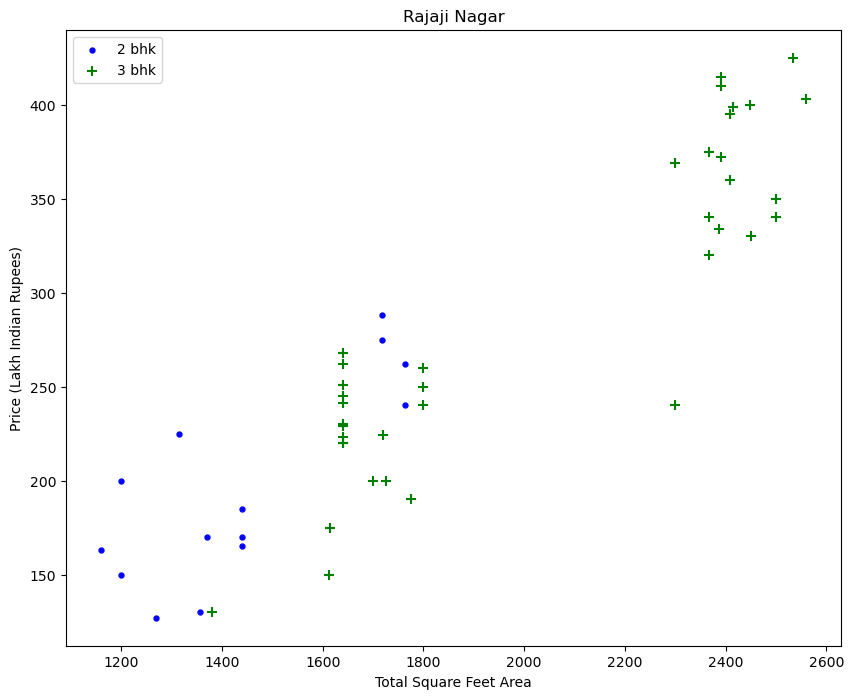

In [45]:
scatter(df7, "Rajaji Nagar")

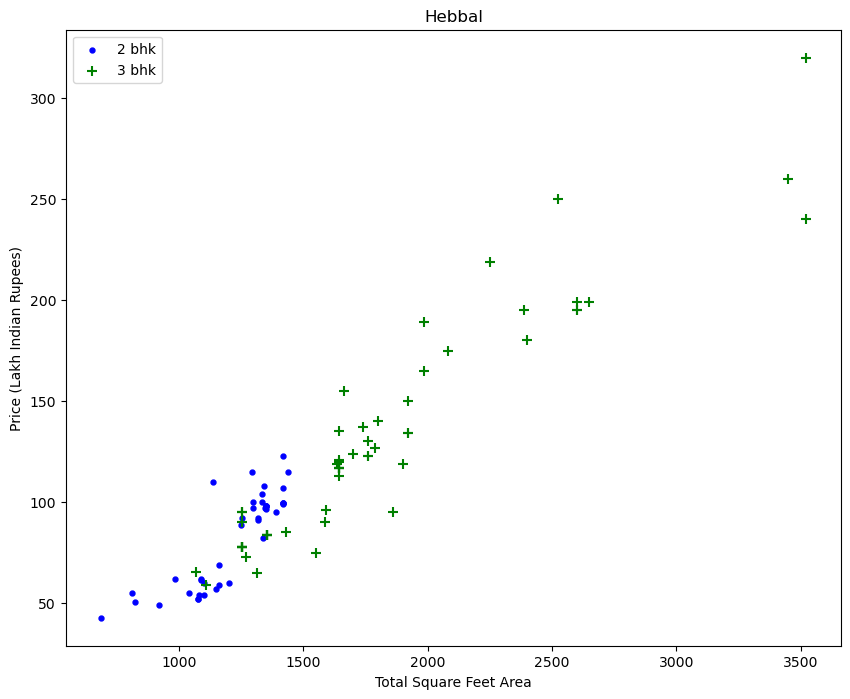

In [46]:
scatter(df7, "Hebbal")

In [78]:
def remove_bhk_outliers(df):

    exclude_index = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stat = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stat[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0], 
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stat.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_index = np.append(exclude_index, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_index, axis="index")

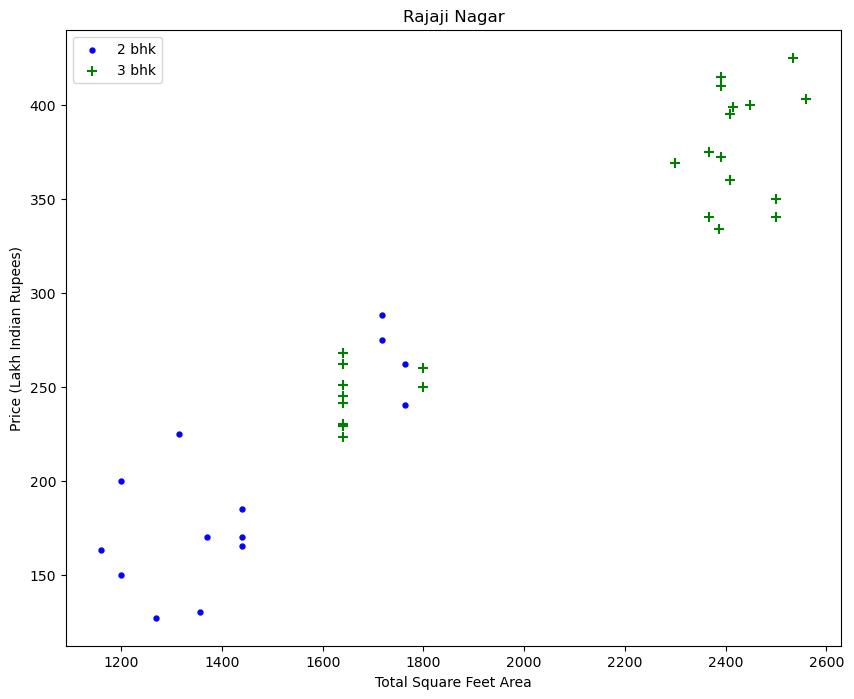

In [79]:
scatter(df8, "Rajaji Nagar")

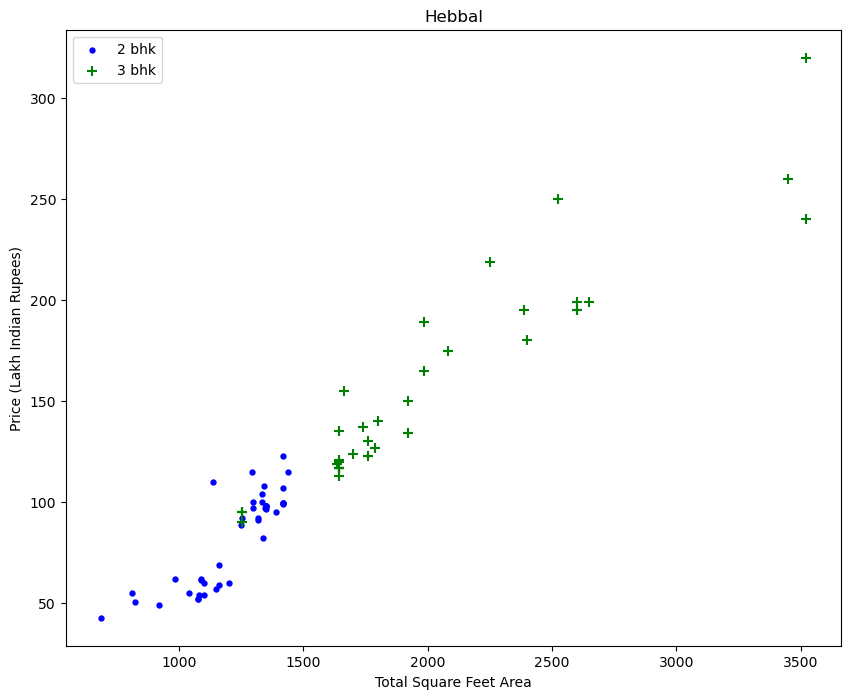

In [80]:
scatter(df8, "Hebbal")

In [81]:
df8.shape

(7317, 7)

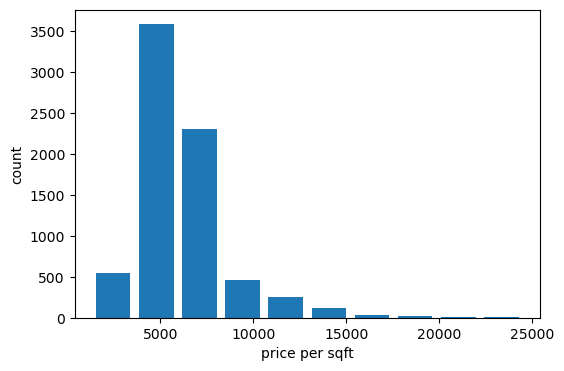

In [83]:
plt.figure(figsize=(6, 4))
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('price per sqft')
plt.ylabel('count')
plt.show()

In [85]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.000000,4.000000,428.000000,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.000000,3.000000,194.000000,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.000000,2.000000,235.000000,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.000000,2.000000,130.000000,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.000000,2.000000,148.000000,2,11983.805668


In [87]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

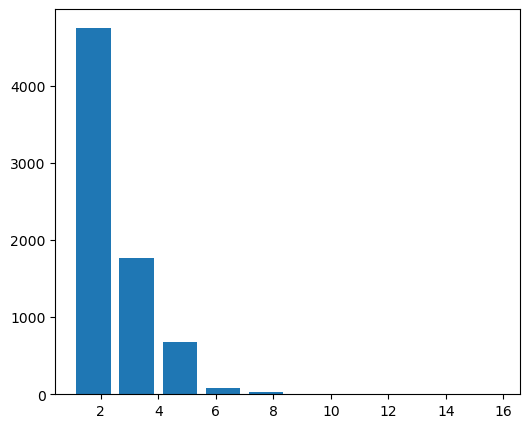

In [89]:
plt.figure(figsize=(6, 5))
plt.hist(df8.bath, rwidth=0.8)
plt.show()

In [92]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.000000,12.000000,160.000000,10,4000.000000
8483,others,10 BHK,12000.000000,12.000000,525.000000,10,4375.000000
8572,others,16 BHK,10000.000000,16.000000,550.000000,16,5500.000000
9306,others,11 BHK,6000.000000,12.000000,150.000000,11,2500.000000
9637,others,13 BHK,5425.000000,13.000000,275.000000,13,5069.124424


In [93]:
df8[df8.bath > (df8.bhk + 2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.000000,7.000000,80.000000,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.000000,8.000000,450.000000,4,6428.571429
6711,Thanisandra,3 BHK,1806.000000,6.000000,116.000000,3,6423.034330
8408,others,6 BHK,11338.000000,9.000000,1000.000000,6,8819.897689


In [96]:
df9 = df8[df8.bath < (df8.bhk + 2)]
df9.shape

(7239, 7)

In [97]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.000000,4.000000,428.000000,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.000000,3.000000,194.000000,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.000000,2.000000,235.000000,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.000000,2.000000,130.000000,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.000000,2.000000,148.000000,2,11983.805668


In [98]:
df10 = df9.drop(["size", 'price_per_sqft'], axis='columns')

In [99]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.000000,4.000000,428.000000,4
1,1st Block Jayanagar,1630.000000,3.000000,194.000000,3
2,1st Block Jayanagar,1875.000000,2.000000,235.000000,3
3,1st Block Jayanagar,1200.000000,2.000000,130.000000,3
4,1st Block Jayanagar,1235.000000,2.000000,148.000000,2


In [113]:
dummies = pd.get_dummies(df10.location) * 1
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df11 = pd.concat([df10, dummies.drop('others', axis='columns')], axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.000000,4.000000,428.000000,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.000000,3.000000,194.000000,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.000000,2.000000,235.000000,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.000000,2.000000,130.000000,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.000000,2.000000,148.000000,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
df12 = df11.drop('location', axis='columns')

In [118]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.000000,4.000000,428.000000,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.000000,3.000000,194.000000,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.000000,2.000000,235.000000,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.000000,2.000000,130.000000,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.000000,2.000000,148.000000,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:


# x, y variable for train a model



In [120]:
x = df12.drop('price', axis="columns")
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.000000,4.000000,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.000000,3.000000,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.000000,2.000000,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.000000,2.000000,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.000000,2.000000,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
y = df12.price
y.head()

0   428.000000
1   194.000000
2   235.000000
3   130.000000
4   148.000000
Name: price, dtype: float64

In [ ]:


# Train Test Split 



In [131]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:


# Linear Regression



In [134]:
from sklearn.linear_model import LinearRegression

lir_clf = LinearRegression()
lir_clf.fit(x_train, y_train)
lir_clf.score(x_test, y_test)

0.8629132245229447

In [ ]:


# cross validation



In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [ ]:


# k-folds 



In [146]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso



In [158]:
def find_best_model_using_gridsearchcv(x, y):

    algos = {'Linear_regression': {
                        'model': LinearRegression(),
                        'params': {
                            
                        }
                                    },
             'Decesion_tree': {
                 'model': DecisionTreeRegressor(),
                 'params': {
                     "criterion": ['squared_error','friedman_mse'],
                     'splitter': ["best", "random"]
                            }
                            },
             'Lasso': {
                 'model': Lasso(),
                 'params': {
                     "alpha": [1.0, 2.0],
                     "selection": ['cyclic', 'random']
                 }
             }
             
            }
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state = 0)
    
    for model_name, model in algos.items():
        
        gs = GridSearchCV(model['model'], model['params'], cv = cv, return_train_score=False)
        gs.fit(x, y)
        
        score.append({
            'model': model_name,
            'best_params': gs.best_params_,
            'best_score': gs.best_score_
        })

    return pd.DataFrame(score, columns=['model', "best_params", 'best_score'])

find_best_model_using_gridsearchcv(x,y)

,model,best_params,best_score
0,Linear_regression,{},0.85
1,Decesion_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.71
2,Lasso,"{'alpha': 2.0, 'selection': 'random'}",0.73


In [183]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lir_clf.predict([X])[0]

In [184]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\JANA JOSEPH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86570258311552

In [185]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

C:\Users\JANA JOSEPH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.08062284986318

In [186]:
predict_price('Indira Nagar',1000, 2, 2)


C:\Users\JANA JOSEPH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.31197733179715

In [187]:
predict_price('Indira Nagar',1000, 3, 3)


C:\Users\JANA JOSEPH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.5268975985448

In [203]:
predict_price("Indira Nagar", 2000, 3, 3)

C:\Users\JANA JOSEPH\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


275.6448008016947

In [ ]:


# exporting the entire file into a pickle file



In [205]:
import pickle

with open("Banglore_Home_price_model.pickle",'wb') as f:
    pickle.dump(lir_clf, f)

In [211]:
import json

columns = {
    'data_columns': [cal.lower() for cal in x.columns]
}

with open("columns.json", "w") as f:
    json.dump(columns, f)